In [1]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import glob
import fnmatch
import os
import SimpleITK as sitk

# ANNOTATIONS

The annotation file is a csv file that contains one finding per line. Each line holds the SeriesInstanceUID of the scan, the x, y, and z position of each finding in world coordinates; and the corresponding diameter in mm. The annotation file contains 1186 nodules.

The list of annotations that are not used as reference standard will be provided. Each line holds the SeriesInstanceUID of the scan, the x, y, and z position of each finding in world coordinates; and the corresponding diameter in mm. It has to be noted that findings that were annotated as nodule < 3 mm and non-nodule have no diameter measurement.

In [2]:
annotations = pd.read_csv("/home/msmith/luna16/CSVFILES/annotations.csv")
annotations

,seriesuid,coordX,coordY,coordZ,diameter_mm
0,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,-128.699421,-175.319272,-298.387506,5.651471
1,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,103.783651,-211.925149,-227.121250,4.224708
2,1.3.6.1.4.1.14519.5.2.1.6279.6001.100398138793...,69.639017,-140.944586,876.374496,5.786348
3,1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016...,-24.013824,192.102405,-391.081276,8.143262
4,1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016...,2.441547,172.464881,-405.493732,18.545150
5,1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016...,90.931713,149.027266,-426.544715,18.208570
6,1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016...,89.540769,196.405159,-515.073322,16.381276
7,1.3.6.1.4.1.14519.5.2.1.6279.6001.100953483028...,81.509646,54.957219,-150.346423,10.362321
8,1.3.6.1.4.1.14519.5.2.1.6279.6001.102681962408...,105.055792,19.825260,-91.247251,21.089619
9,1.3.6.1.4.1.14519.5.2.1.6279.6001.104562737760...,-124.834262,127.247155,-473.064479,10.465854


In [3]:
# Some Functions
def getPathSeriesuid(seriesuid):
    for roots, dirs, files in os.walk('/home/msmith/luna16/'):
            for filename in fnmatch.filter(files,pattern):
                returnPath = os.path.join(roots,filename)
                print(returnPath)
    return returnPath


def load_itk_image(filename):
    itkimage = sitk.ReadImage(filename)
    numpyImage = sitk.GetArrayFromImage(itkimage)
    numpyOrigin = np.array(list(reversed(itkimage.GetOrigin())))
    numpySpacing = np.array(list(reversed(itkimage.GetSpacing())))
    return numpyImage, numpyOrigin, numpySpacing

'''
def load_itk_image(filename):
    itkimage = sitk.ReadImage(filename)
    numpyImage = sitk.GetArrayFromImage(itkimage)
    numpyOrigin = np.array(list(itkimage.GetOrigin()))
    numpySpacing = np.array(list(itkimage.GetSpacing()))
    return numpyImage, numpyOrigin, numpySpacing
'''

def worldToVoxelCoord(worldCoord, origin, spacing):
    stretchedVoxelCoord = np.absolute(worldCoord - origin)
    voxelCoord = stretchedVoxelCoord / spacing
    return voxelCoord

In [18]:
ofInterest = annotations[annotations["seriesuid"].str.contains("1.3.6.1.4.1.14519.5.2.1.6279.6001.134996872583497382954024478441")]
ofInterest

,seriesuid,coordX,coordY,coordZ,diameter_mm
129,1.3.6.1.4.1.14519.5.2.1.6279.6001.134996872583...,-84.046581,-42.015360,-146.807400,7.053720
130,1.3.6.1.4.1.14519.5.2.1.6279.6001.134996872583...,-70.323099,56.204384,-82.479458,7.888814
131,1.3.6.1.4.1.14519.5.2.1.6279.6001.134996872583...,-86.853843,15.041574,-72.326810,9.258260
132,1.3.6.1.4.1.14519.5.2.1.6279.6001.134996872583...,99.634489,-25.732286,-199.615356,6.779556


In [72]:
# Get random annotation from list
#randInt = np.random.randint(annotations.shape[0])
randInt = 131
print("Using observation", randInt)
randAnnotation = annotations.iloc[randInt]

noduleCoords = randAnnotation['coordX'],randAnnotation['coordY'],randAnnotation['coordZ']
pattern = '*'+randAnnotation['seriesuid']+'*'
print(randAnnotation)
print("=="*50)
print("=="*50)
imgPath = getPathSeriesuid(pattern)
rawPath = imgPath[:-3] + 'raw'
img = np.fromfile(rawPath,dtype='int16')
with open(imgPath[:-3] + 'mhd',"r") as f:
    imgData = f.read()
    print(imgData)
mhdPath = rawPath[:-3] + 'mhd'
img, imgOrigin, imgSpacing = load_itk_image(mhdPath)
annotations[randInt:randInt+1]

('Using observation', 131)
seriesuid      1.3.6.1.4.1.14519.5.2.1.6279.6001.134996872583...
coordX                                                 -86.85384
coordY                                                  15.04157
coordZ                                                 -72.32681
diameter_mm                                              9.25826
Name: 131, dtype: object
/home/msmith/luna16/subset0/1.3.6.1.4.1.14519.5.2.1.6279.6001.134996872583497382954024478441.mhd
/home/msmith/luna16/subset0/1.3.6.1.4.1.14519.5.2.1.6279.6001.134996872583497382954024478441.raw
ObjectType = Image
NDims = 3
BinaryData = True
BinaryDataByteOrderMSB = False
CompressedData = False
TransformMatrix = 1 0 0 0 1 0 0 0 1
Offset = -238.10000600000001 -220 -273.25
CenterOfRotation = 0 0 0
AnatomicalOrientation = RAI
ElementSpacing = 0.859375 0.859375 1.25
DimSize = 512 512 197
ElementType = MET_SHORT
ElementDataFile = 1.3.6.1.4.1.14519.5.2.1.6279.6001.134996872583497382954024478441.raw



,seriesuid,coordX,coordY,coordZ,diameter_mm
131,1.3.6.1.4.1.14519.5.2.1.6279.6001.134996872583...,-86.853843,15.041574,-72.32681,9.25826


In [103]:
# Nodule voxel coordinates
print("Image shape ==>" + "\n" + str(img.shape))
nvc = worldToVoxelCoord(noduleCoords[::-1],imgOrigin,imgSpacing)
nvc = np.array(nvc.astype(int))
print("Nodule coordinates @"+"\n" + str(nvc))
#Get a range in which to subset the data
margin = 50
nvcMinus,nvcPlus = (nvc - margin).astype(int), (nvc + margin).astype(int)
print("NVC margins ==>" + "\n" + str(nvcMinus) + "\n" + str(nvcPlus))

Image shape ==>
(197, 512, 512)
Nodule coordinates @
[160 273 175]
NVC margins ==>
[110 223 125]
[210 323 225]


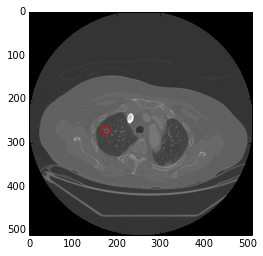

In [109]:
from matplotlib.patches import Rectangle
#rectangle = plt.Rectangle((nvcMinus[1], nvcMinus[2]), nvcPlus[1], nvcPlus[2], facecolor = 'none', ec='r')
circle = plt.Circle((nvc[2],nvc[1]),10, facecolor = 'none', ec='r')
#plt.gca().add_patch(rectangle)
plt.gca().add_patch(circle)
plt.imshow(img[nvc[0]],cmap=cm.gray)
plt.show()


110


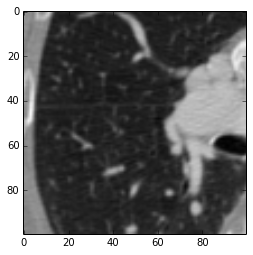

120


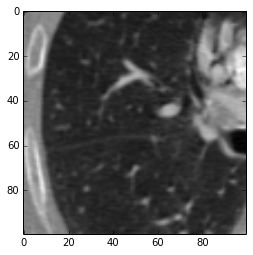

130


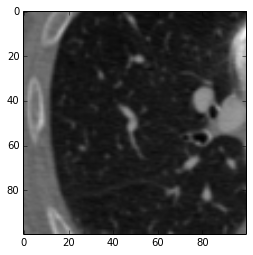

140


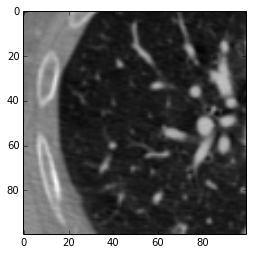

150


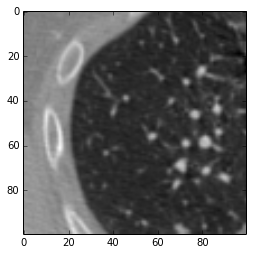

Nodule located here
160


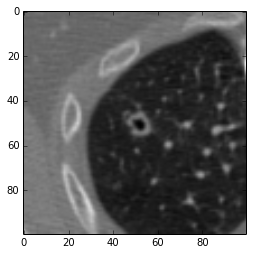

170


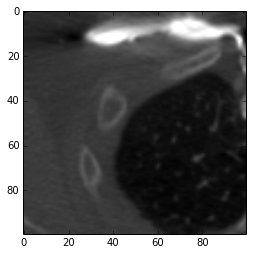

180


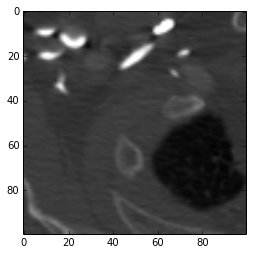

190


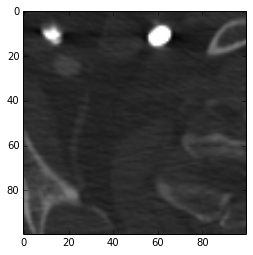

200


IndexError: index 200 is out of bounds for axis 0 with size 197

In [111]:
for i in xrange(nvcMinus[0],nvcPlus[0],10):
    if i == nvc[0]:
        print("Nodule located here")
    print(i)
    plt.imshow(img[i,nvcMinus[1]:nvcPlus[1],nvcMinus[2]:nvcPlus[2]],cmap=cm.gray)
    plt.show()

In [21]:
voxels = img.flatten().shape[0]

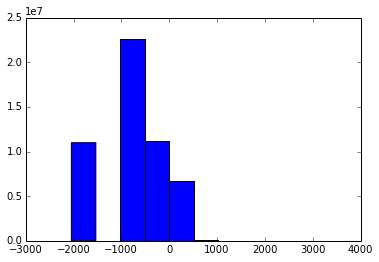

In [22]:
plt.hist(img.flatten())
plt.show()

In [ ]:
#img1 = np.clip(img[59,180:220,140:180],-1000,-600)
img1 = img[59,180:220,140:180]
plt.hist(img1.flatten())
plt.show()

In [ ]:
img2 = np.clip(img1,-1000,-800)

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
x,y = np.arange(0,img1.shape[0],1),np.arange(0,img2.shape[0],1)

In [ ]:
x,y = np.meshgrid(x,y)

In [ ]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(x,y,img1)

In [ ]:

x = noduleVoxelCoords[0]
y = noduleVoxelCoords[1]
z = noduleVoxelCoords[2]
for a in range(55,66,1):
    plt.figure(figsize=(7,7))
    img1=img[a,180:220,140:180]
    plt.imshow(np.clip(img1,-1000,-500),cmap=cm.gray)
    plt.show()

In [ ]:
from scipy.interpolate import RegularGridInterpolator

In [ ]:
# Get a 3D image eg. subset of img
subsetSize = 20
img3 = img[:subsetSize,:subsetSize,:subsetSize]
x,y,z = np.arange(subsetSize),np.arange(subsetSize),np.arange(subsetSize)
interpolator = RegularGridInterpolator((x,y,z),img3,bounds_error=False,fill_value=img3.mean())

In [ ]:
interpolator

# CANDIDATES

The candidates file is a csv file that contains nodule candidate per line. Each line holds the scan name, the x, y, and z position of each candidate in world coordinates, and the corresponding class. The list of candidates is provided for participants who are following the ‘false positive reduction’ track. Tutorial on how to view lesions given the location of candidates will be available on the Forum page.

The candidate locations are computed using three existing candidate detection algorithms [1-3]. As lesions can be detected by multiple candidates, those that are located <= 5 mm are merged. Using this method, 1120 out of 1186 nodules are detected with 551,065 false positives. For convenience, the corresponding class label (0 for non-nodule and 1 for nodule) for each candidate is provided in the list. It has to be noted that there can be multiple candidates per nodule.

In [ ]:
candidates = pd.read_csv("/home/msmith/luna16/CSVFILES/candidates.csv")
candidatesClass = candidates['class']
candidatesClass.hist(bins=2)
propClass1 = candidatesClass[candidatesClass==1].sum()/float(candidatesClass.size)
plt.title("Candidates class count. Proportion class 1 = "+str(propClass1))
plt.show()